# Dataset D2 - TCRA real

## Importing libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tkr

## Data reading and formating

In [45]:
data = pd.read_csv('../summary_data/D2_TCRA_real_summary.csv')
data['total_corrections']=data['Base - TP']+ data['Base - FP']

## Defining color dictionary

In [46]:
color_dict=dict({'Bfc':'purple','Bless':'orange','Coral':'brown','Fiona':'gray','Lighter':'pink','Musket':'blue','Pollux':'yellow','Racer':'green','Reckoner':'red','Sga':'black'})

## Selecting best kmer for each tool and sample

In [47]:
data_best = data.loc[data.groupby(["Tool","Sample"])["Base Gain"].idxmax()]  

## Selecting average values for each tool

In [48]:
data_avg = data_best.groupby(['Tool'],as_index=False).mean()

<br>
<br>

## Figure 3a
Bar plot depicting the gain across various error correction methods when applied to TCR-Seq data.<br> 
Vertical bars depict the various gains across 8 TCR-Seq samples.
<br>Average value across 8 samples is reported for each tool.

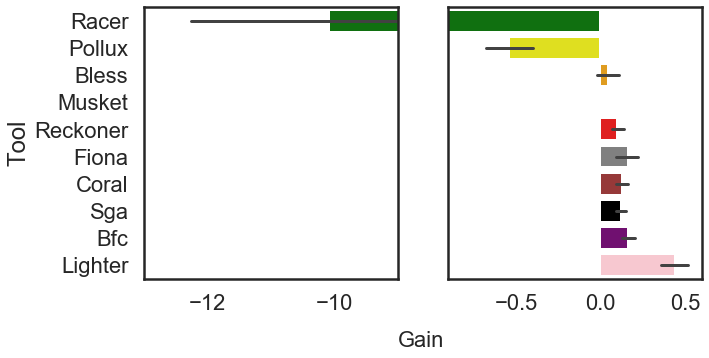

In [49]:
sns.set_style("white")
sns.set_context("poster")

f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharey=True)
ax = sns.barplot(y="Tool", 
              x="Base Gain",
              data = data_best.sort_values(by="Base Gain", ascending=True), 
              palette=color_dict,
             errwidth=3,ax=ax1)
ax = sns.barplot(y="Tool", 
              x="Base Gain",
              data = data_best.sort_values(by="Base Gain", ascending=True), 
              palette=color_dict,
             errwidth=3,ax=ax2)

ax1.set_xlim(-13, -9)
ax2.set_xlim(-.9, 0.6)

ax2.set(xlabel='', ylabel='')
ax1.set(xlabel='')

fig = plt.gcf()
fig.set_size_inches(10,5)

ax.text(-1.20, 12,'Gain', fontsize=22)

plt.savefig("../figures/D2_TCRA_real/Fig3a_TCRA_real_human_gain.png", bbox_inches='tight')
plt.savefig("../figures/D2_TCRA_real/Fig3a_TCRA_real_human_gain.pdf", bbox_inches='tight')

##### <br>
<br>

## Figure 3b
Scatter plot depicting the number of TP corrections (x-axis) and FP corrections (y-axis).<br> 
Average across 8 samples is reported for each tool.

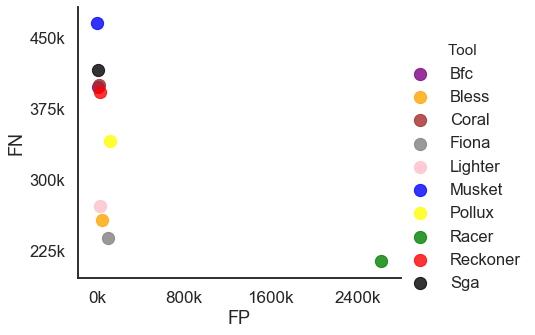

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.lmplot(data = data_avg, 
             x='Base - FP', 
             y='Base - FN', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})
g.set(xlabel='FP', ylabel='FN')
#g.set(xscale='log')

import matplotlib.ticker as tkr

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(75000))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(800000))
    
sns.set_style("white")
sns.set_context("talk")
sns.despine()


plt.savefig("../figures/D2_TCRA_real/Fig3b_FN_vs_FP.png", bbox_inches="tight")
plt.savefig("../figures/D2_TCRA_real/Fig3b_FN_vs_FP.pdf", bbox_inches="tight")

<br>
<br>

## Figure 3c
Scatter plot depicting the number of TP corrections (x-axis) and FP corrections (y-axis). 
<br>Average across 8 samples is reported for each tool.

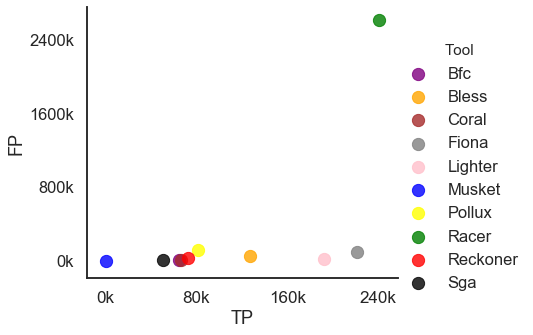

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.lmplot(data=data_avg , 
             x='Base - TP', 
             y='Base - FP', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='TP', ylabel='FP')
    
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(800000))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(80000))

sns.set_style("white")
sns.set_context("talk")
sns.despine()


g=sns.despine()
plt.savefig("../figures/D2_TCRA_real/Fig3c_Precision_vs_Sensitivity.png", bbox_inches="tight")
plt.savefig("../figures/D2_TCRA_real/Fig3c_Precision_vs_Sensitivity.pdf", bbox_inches="tight")

<br> 
<br> 

## Figure 3d
Scatter plot depicting the sensitivity (x-axis) and precision (y-axis) of each tool. <br>
Average across 8 samples is reported for each tool.


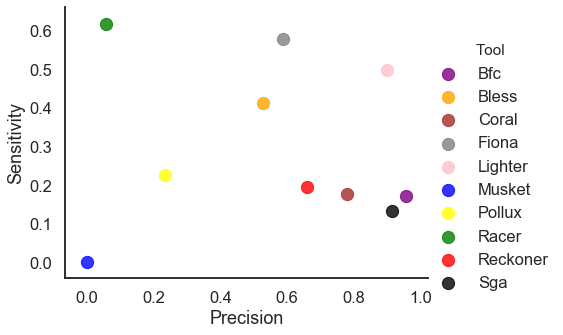

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.lmplot(data=data_avg, 
             x='Base Precision', 
             y='Base Sensitivity', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='Precision', ylabel='Sensitivity')
g=sns.despine()

sns.set_style("white")
sns.set_context("talk")
sns.despine()



plt.savefig("../figures/D2_TCRA_real/Fig3d_Precision_vs_Sensitivity.png", bbox_inches="tight")
plt.savefig("../figures/D2_TCRA_real/Fig3d_Precision_vs_Sensitivity.pdf", bbox_inches="tight")

<br>
<br>

## Figure S13
The effect of kmer size on the accuracy of the error correction tools across various coverages settings across 8 real TCR-Seq samples

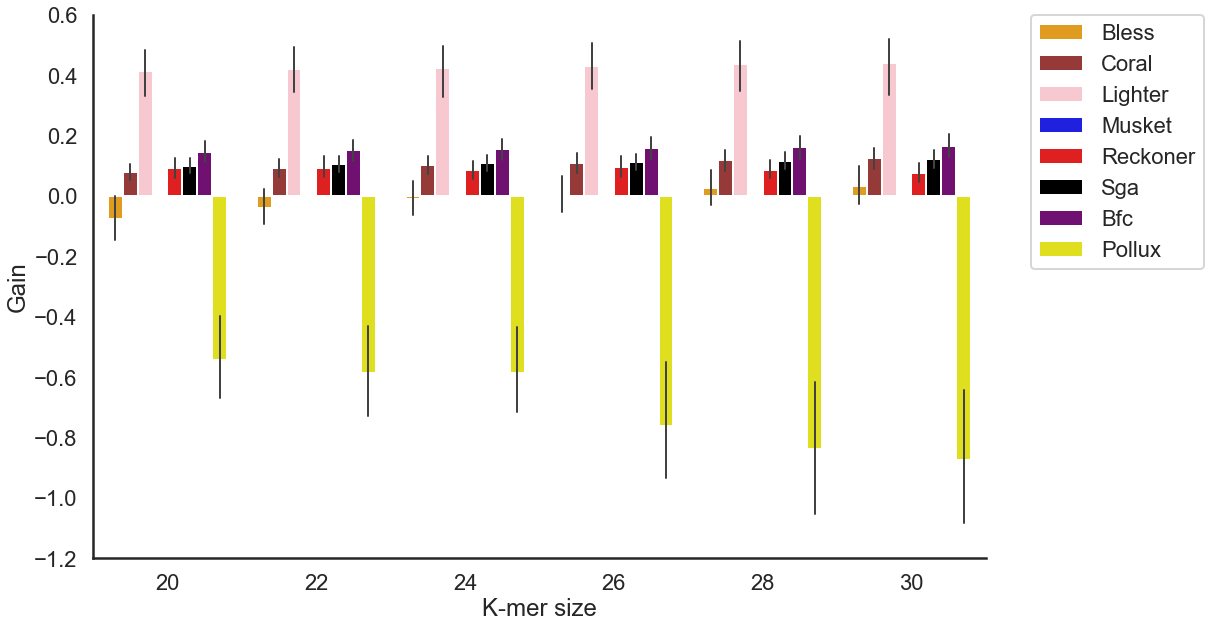

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot(x="Kmer Size", 
              y="Base Gain",
              data = data[(data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              hue='Tool',
              palette=color_dict, 
              errwidth=2)
g.set(xlabel='K-mer size', ylabel='Gain')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(-1.2, 0.6)
g=sns.despine()

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.set_style("white")
sns.set_context("talk")
sns.despine()


plt.savefig("../figures/D2_TCRA_real/FigS13_kmers_gain.png", bbox_inches='tight')
plt.savefig("../figures/D2_TCRA_real/FigS13_kmers_gain.pdf", bbox_inches='tight')